In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

In [3]:
# Apply PCA
n_components = 5  # Adjust as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [4]:
# Initialize the regression model
model = LinearRegression()

In [5]:
# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# Perform cross-validation
scores = cross_val_score(model, X_pca, y, scoring='neg_mean_squared_error', cv=cv)

In [7]:
# Convert negative MSE to positive values
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

In [8]:
# Fit the model and calculate R-squared score
model.fit(X_pca, y)
y_pred = model.predict(X_pca)
r2 = r2_score(y, y_pred)

print("MSE scores:", mse_scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R-squared Score:", r2)

MSE scores: [ 9268.15307681  9843.9764149  12960.15131837 15348.10796199
  6216.70572531]
RMSE scores: [ 96.2712474   99.21681518 113.84266036 123.88748105  78.84608884]
Mean RMSE: 102.41285856859285
R-squared Score: 0.7506174314221044


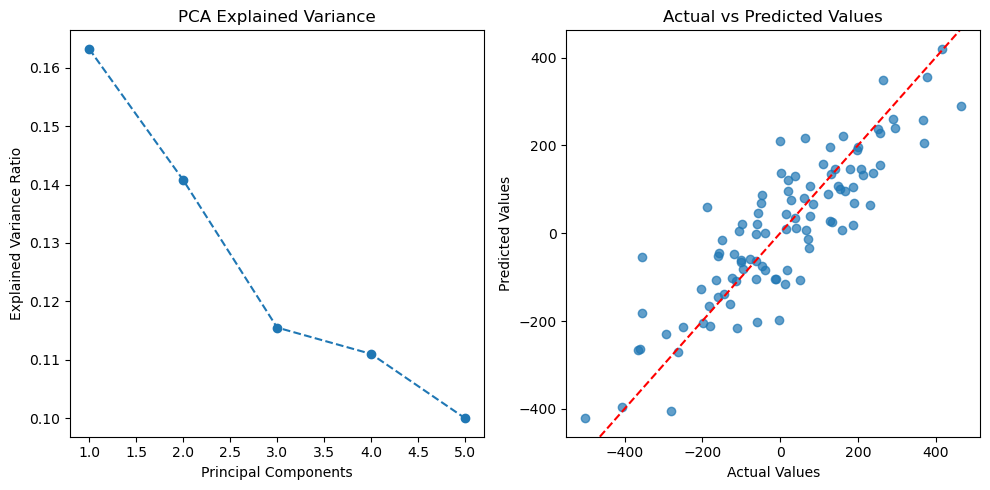

In [9]:
# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')

plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.axline((0, 0), slope=1, color='red', linestyle='--')

plt.tight_layout()
plt.show()